In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')

from keras import Sequential

import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn import tree
from colorama import Fore  #Colorama is a module to color the python outputs
from urllib.parse import urlparse

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld

# 現在我們可以建立我們的模型。我們將使用一個簡單的LSTM模型。
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

2024-04-07 15:20:17.283555: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/simhoz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('train_dataset_3.csv')
df.head(10)

,uid,website_links,anchor_url,request_url,email_submission,different_href_urls,right_click_disabled,popup_window_text_fields,iframe_redirection,favicon_external_domain,result
0,1613574881790709,4,0,0,0,0,0,0,0,0,1
1,1623162132018227,24,0,0,0,0,0,0,1,0,1
2,1635699331475663,82,6,0,3,0,0,0,1,0,1
3,1635712778507665,68,1,0,0,0,0,0,1,0,1
4,2000000000002657,6,1,0,1,0,0,0,0,0,0
5,1613579184612232,37,1,0,0,0,0,0,1,0,1
6,1626167976794041,114,0,0,0,0,0,0,0,0,1
7,2000000000017748,69,4,0,3,0,0,0,0,0,0
8,1620673515780765,15,0,0,0,0,0,0,0,0,1
9,1635698276338303,90,2,0,0,0,0,1,0,0,1


In [3]:
count_pos = df[df['result'] == 1].shape[0]
count_neg = df[df['result'] == 0].shape[0]
print(f"count_pos:{count_pos} count_neg:{count_neg}")

count_pos:60000 count_neg:25920


In [3]:
df.columns

Index(['uid', 'website_links', 'anchor_url', 'request_url', 'email_submission',
       'different_href_urls', 'right_click_disabled',
       'popup_window_text_fields', 'iframe_redirection',
       'favicon_external_domain', 'result'],
      dtype='object')

In [4]:
feature = ['website_links', 'anchor_url', 'request_url', 'email_submission',
       'different_href_urls', 'right_click_disabled',
       'popup_window_text_fields', 'iframe_redirection',
       'favicon_external_domain', 'result']

def positive_number(num):
    if num == 1:
        return 1
    else:
        return 0
    
for a in feature:
    df[a] = df[a].apply(lambda x: positive_number(x))
    
df.head(20)

,uid,website_links,anchor_url,request_url,email_submission,different_href_urls,right_click_disabled,popup_window_text_fields,iframe_redirection,favicon_external_domain,result
0,1613574881790709,0,0,0,0,0,0,0,0,0,1
1,1623162132018227,0,0,0,0,0,0,0,1,0,1
2,1635699331475663,0,0,0,0,0,0,0,1,0,1
3,1635712778507665,0,1,0,0,0,0,0,1,0,1
4,2000000000002657,0,1,0,1,0,0,0,0,0,0
5,1613579184612232,0,1,0,0,0,0,0,1,0,1
6,1626167976794041,0,0,0,0,0,0,0,0,0,1
7,2000000000017748,0,0,0,0,0,0,0,0,0,0
8,1620673515780765,0,0,0,0,0,0,0,0,0,1
9,1635698276338303,0,0,0,0,0,0,1,0,0,1


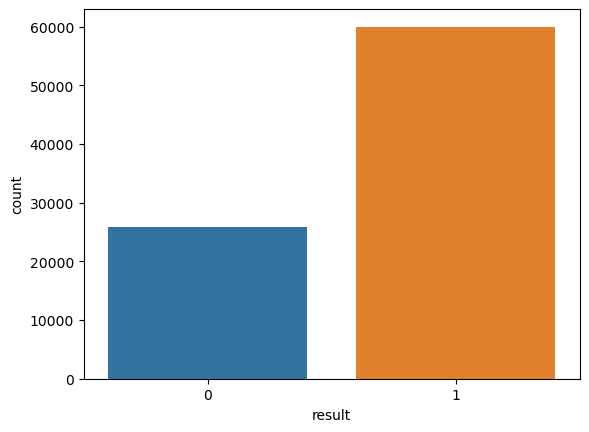

In [5]:
sns.countplot(x='result', data=df);

<AxesSubplot:>

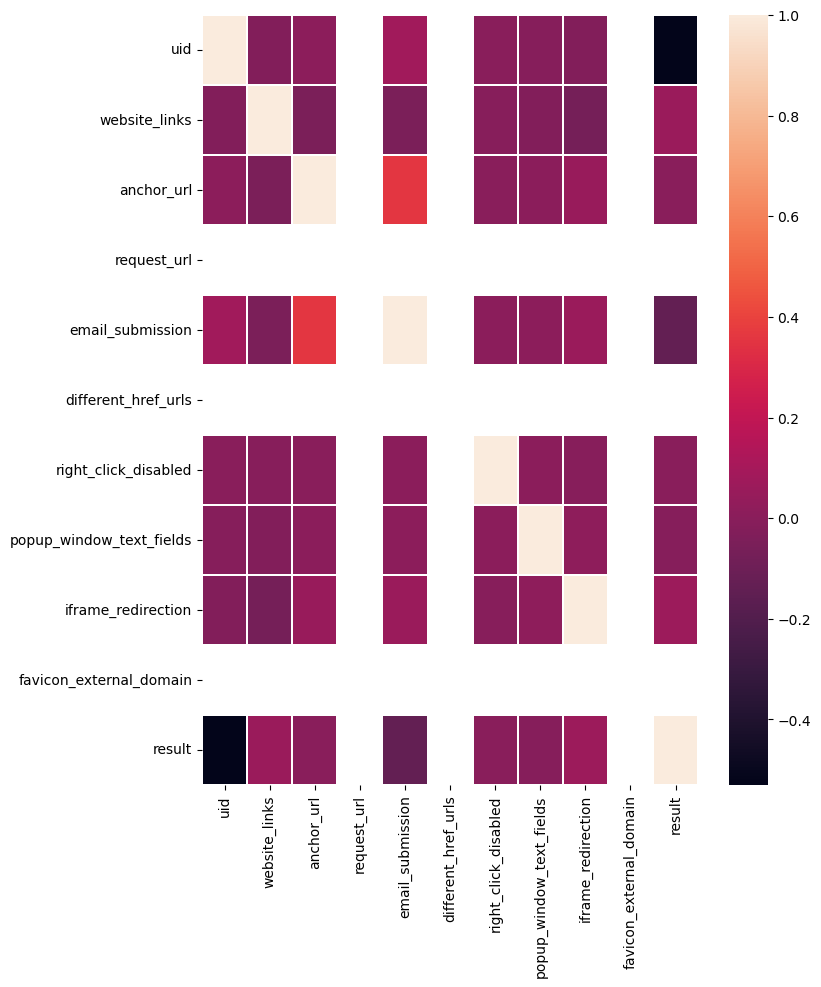

In [6]:
plt.figure(figsize=(8, 10))
sns.heatmap(df.corr(), linewidths=.1)

<Figure size 800x1000 with 0 Axes>

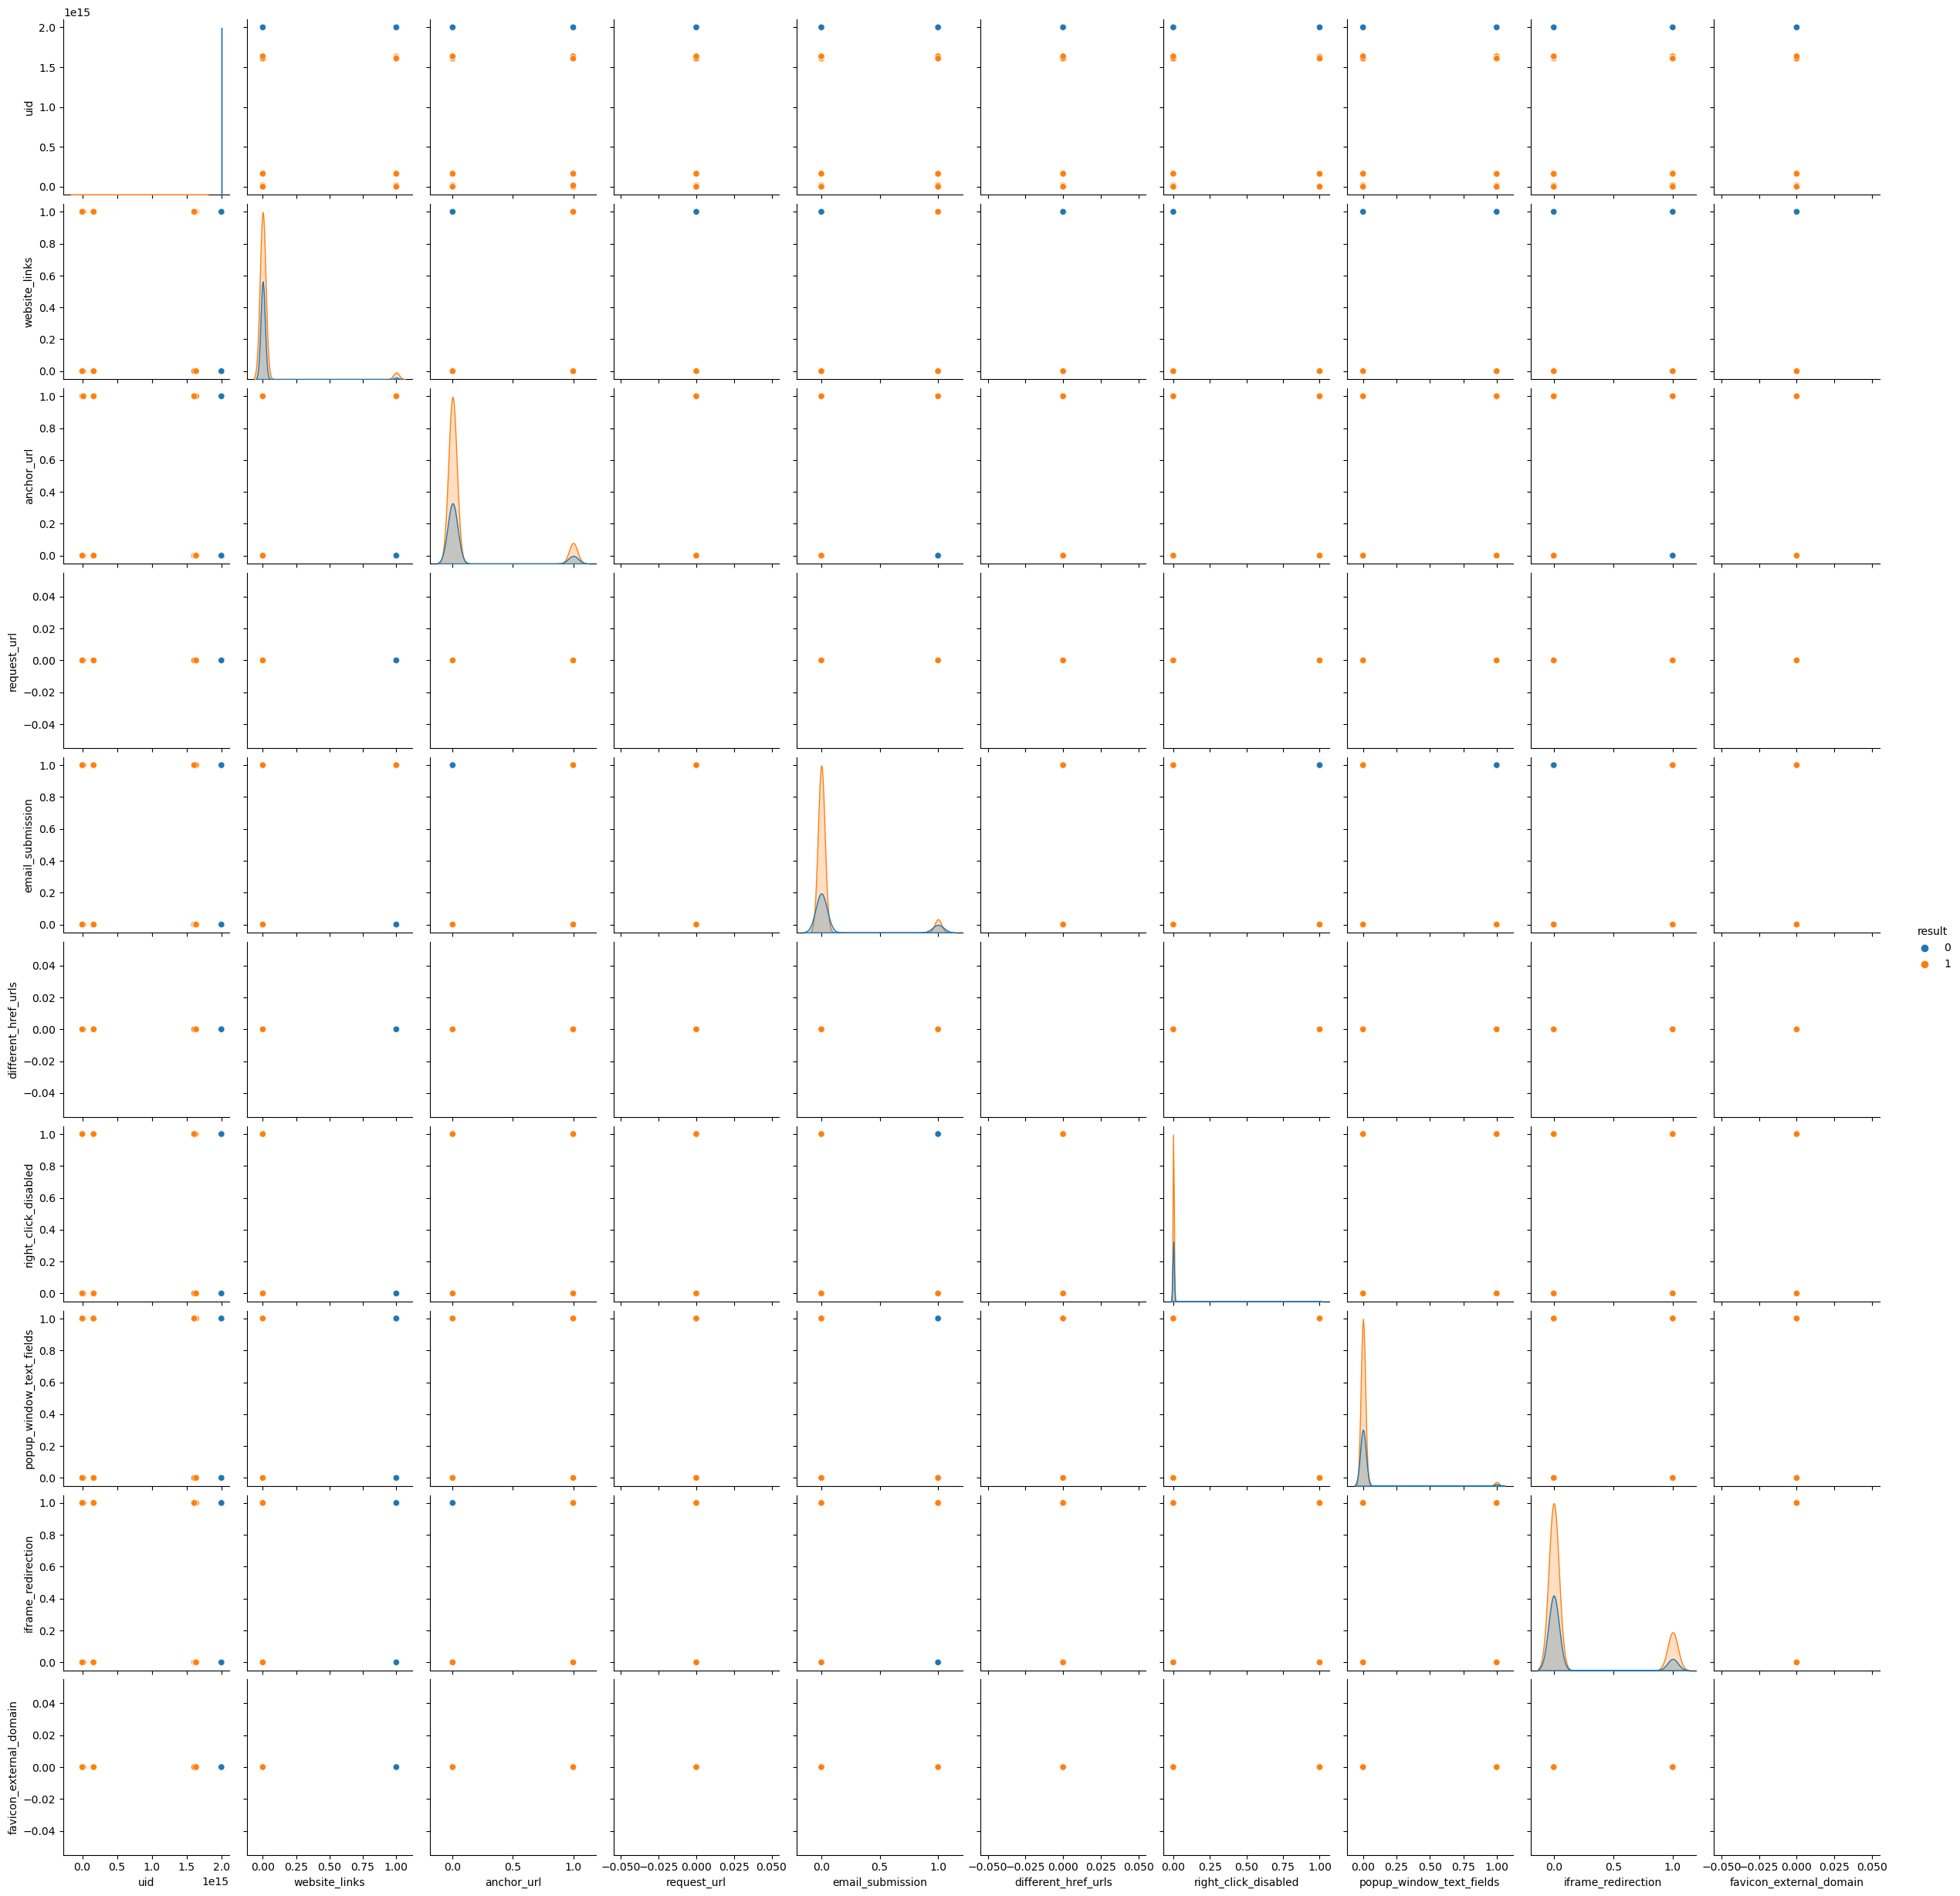

In [7]:
plt.figure(figsize=(8, 10))
sns.pairplot(data=df,hue="result") 

In [9]:
Y1 = df['result']
X1 = df.drop(columns = ['uid','result'])

In [10]:
Y1

0        1
1        1
2        1
3        1
4        0
        ..
85915    0
85916    1
85917    0
85918    1
85919    1
Name: result, Length: 85920, dtype: int64

In [11]:
X1.head(2)

,website_links,anchor_url,request_url,email_submission,different_href_urls,right_click_disabled,popup_window_text_fields,iframe_redirection,favicon_external_domain
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0


In [12]:
Y1.head(24)

0     1
1     1
2     1
3     1
4     0
5     1
6     1
7     0
8     1
9     1
10    1
11    0
12    1
13    1
14    1
15    1
16    1
17    1
18    0
19    1
20    0
21    0
22    1
23    1
Name: result, dtype: int64

In [13]:
#data for learning without features 

X2 = df['uid']
X2.head(2)

0    1613574881790709
1    1623162132018227
Name: uid, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X1,Y1,stratify = Y1,test_size = 0.2,random_state = 42)

In [15]:
X_train1 = np.expand_dims(X_train1, axis=-1)
X_test1 = np.expand_dims(X_test1, axis=-1)

X_train1.shape

(68736, 9, 1)

In [16]:
input_size1 = X_train1[1].shape
input_size1

(9, 1)

In [17]:
# Evaluation Helper Functions
def eval_graph(results):

    acc = results.history['accuracy']
    val_acc = results.history['val_accuracy']
    epochs = range(len(acc))
    fig = plt.figure(figsize=(14,7))
    plt.plot(epochs,acc,'r',label="Training Accuracy")
    plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
    plt.legend(loc='upper left')
    plt.title("ACCURACY GRAPH")
    plt.show()
    
    loss = results.history['loss']
    val_loss = results.history['val_loss']
    epochs = range(len(loss))
    fig = plt.figure(figsize=(14,7))
    plt.plot(epochs,loss,'r',label="Training loss")
    plt.plot(epochs,val_loss,'b',label="Validation loss")
    plt.legend(loc='upper left')
    plt.title("LOSS GRAPH")
    plt.show()

In [18]:
def conf_matrix(X_test,Y_test,model):
    
    Y_pred = model.predict(X_test)
    Y_pred = Y_pred>0.5
    cm = confusion_matrix(Y_test,Y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap = plt.cm.YlGn)
    plt.title('CONFUSION MATRIX')
    plt.show()

In [19]:
# CNN MODEL
def CNN(input_size):
    model = keras.Sequential()
    model.add(layers.Input(input_size))
    model.add(layers.Conv1D(filters = 16,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 32,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 64,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 128,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 256,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(512,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    
    return model

CNN_model1 = CNN(input_size1)
CNN_model1.summary()

2024-03-11 19:31:38.405841: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 9, 16)             64        
                                                                 
 dropout (Dropout)           (None, 9, 16)             0         
                                                                 
 batch_normalization (BatchN  (None, 9, 16)            64        
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 16)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 32)             1568      
                                                                 
 dropout_1 (Dropout)         (None, 5, 32)             0

In [20]:
# CNN MODEL ON FIRST DATASET
CNN_model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_MODEL_ON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_results_1 = CNN_model1.fit(X_train1,Y_train1,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
427/430 [============================>.] - ETA: 0s - loss: 0.6475 - accuracy: 0.6791
Epoch 1: val_loss improved from inf to 0.61274, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 8s 14ms/step - loss: 0.6474 - accuracy: 0.6792 - val_loss: 0.6127 - val_accuracy: 0.7016
Epoch 2/200
428/430 [============================>.] - ETA: 0s - loss: 0.6113 - accuracy: 0.6993
Epoch 2: val_loss improved from 0.61274 to 0.59778, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 5s 12ms/step - loss: 0.6115 - accuracy: 0.6991 - val_loss: 0.5978 - val_accuracy: 0.7045
Epoch 3/200
428/430 [============================>.] - ETA: 0s - loss: 0.6060 - accuracy: 0.7006
Epoch 3: val_loss did not improve from 0.59778
430/430 [==============================] - 5s 12ms/step - loss: 0.6058 - accuracy: 0.7008 - val_loss: 0.6006 - val_accuracy: 0.7045
Epoch 4/200
428/430 [============================>.] - ETA: 0s - l

430/430 [==============================] - 7s 17ms/step - loss: 0.6003 - accuracy: 0.7007 - val_loss: 0.5952 - val_accuracy: 0.7076
Epoch 30/200
428/430 [============================>.] - ETA: 0s - loss: 0.6002 - accuracy: 0.7017
Epoch 30: val_loss did not improve from 0.59517
430/430 [==============================] - 7s 17ms/step - loss: 0.6003 - accuracy: 0.7016 - val_loss: 0.5964 - val_accuracy: 0.7076
Epoch 31/200
426/430 [============================>.] - ETA: 0s - loss: 0.6001 - accuracy: 0.7017
Epoch 31: val_loss did not improve from 0.59517
430/430 [==============================] - 7s 17ms/step - loss: 0.6001 - accuracy: 0.7018 - val_loss: 0.5978 - val_accuracy: 0.7016
Epoch 32/200
428/430 [============================>.] - ETA: 0s - loss: 0.5996 - accuracy: 0.7021
Epoch 32: val_loss did not improve from 0.59517
430/430 [==============================] - 7s 17ms/step - loss: 0.5998 - accuracy: 0.7019 - val_loss: 0.5955 - val_accuracy: 0.7076
Epoch 33/200
427/430 [============

Epoch 59/200
428/430 [============================>.] - ETA: 0s - loss: 0.5992 - accuracy: 0.7021
Epoch 59: val_loss did not improve from 0.59517
430/430 [==============================] - 8s 18ms/step - loss: 0.5992 - accuracy: 0.7022 - val_loss: 0.5956 - val_accuracy: 0.7076
Epoch 59: early stopping


In [21]:
CNN_model1.evaluate(X_test1,Y_test1,verbose = 1)

537/537 [==============================] - 2s 4ms/step - loss: 0.5970 - accuracy: 0.7073


[0.5969509482383728, 0.7072858214378357]

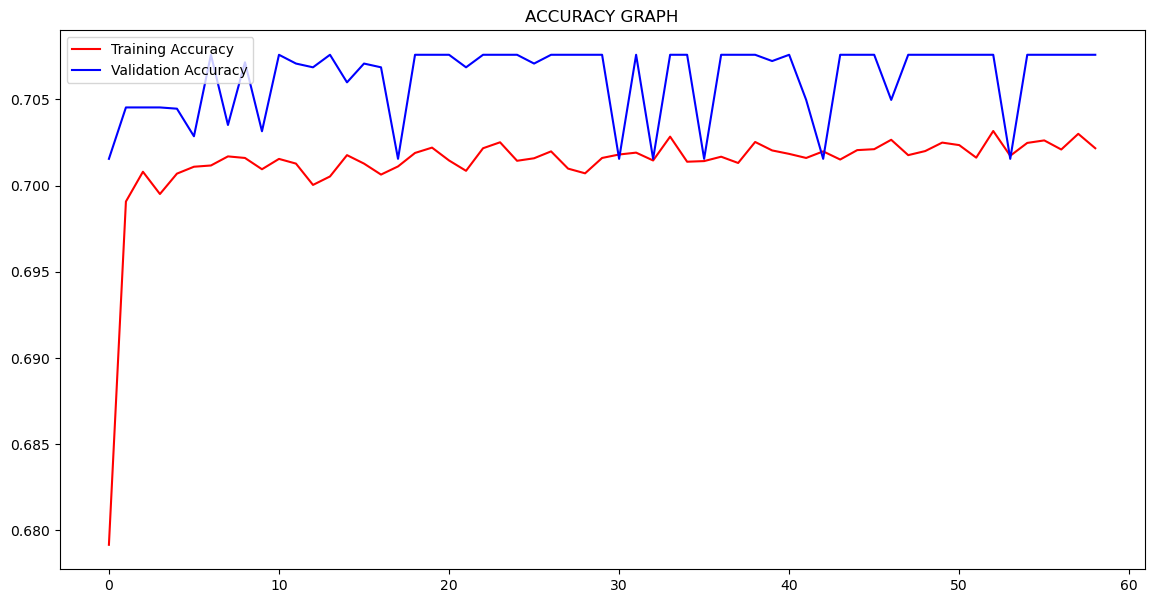

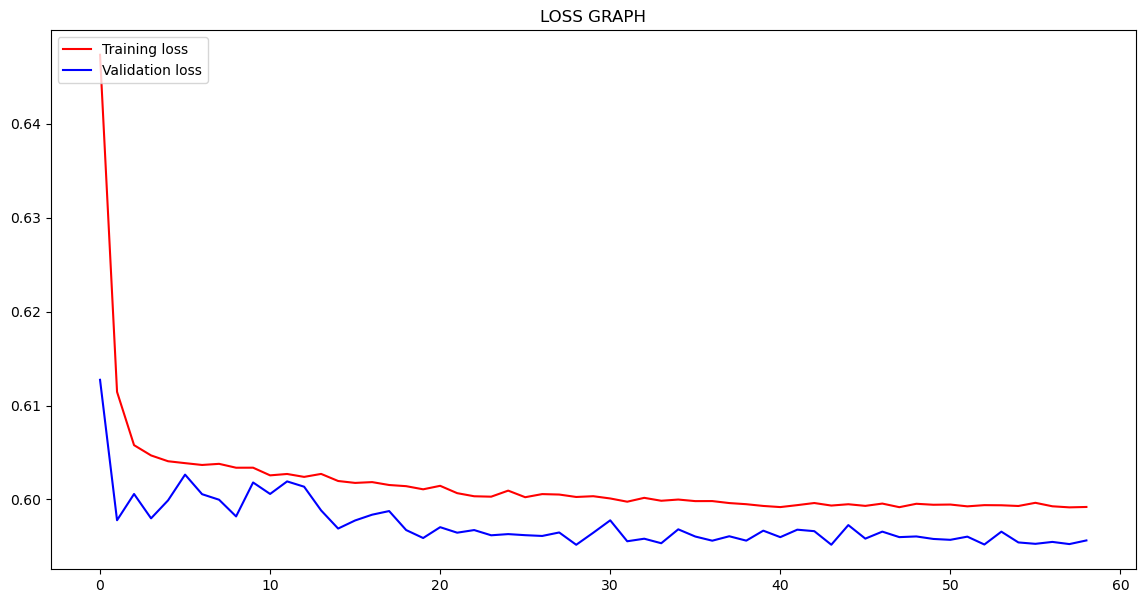

In [22]:
eval_graph(CNN_results_1)

In [23]:
X_test1[0]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [24]:
Y_test1

58013    1
70482    0
54886    1
32999    1
39721    0
        ..
40442    1
37961    0
75251    1
53912    1
13678    1
Name: result, Length: 17184, dtype: int64

537/537 [==============================] - 2s 4ms/step


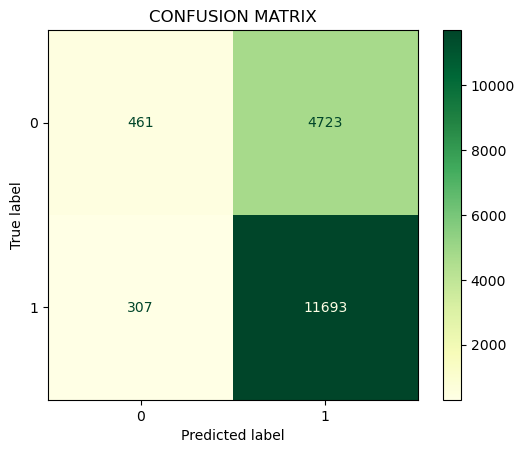

In [25]:
conf_matrix(X_test1,Y_test1,CNN_model1)

In [28]:
# CNN LSTM MODEL
def CNN_LSTM(input_size):
    model = keras.Sequential()
    model.add(layers.Input(input_size))
    model.add(layers.Conv1D(filters = 16,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 32,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 64,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 128,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 256,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.LSTM(128,return_sequences=True))
    model.add(layers.Dropout(0.3))
    model.add(layers.Flatten())
    model.add(layers.Dense(128,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    
    return model

CNN_LSTM_model1 = CNN_LSTM(input_size1)
CNN_LSTM_model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 9, 16)             64        
                                                                 
 dropout_7 (Dropout)         (None, 9, 16)             0         
                                                                 
 batch_normalization_5 (Batc  (None, 9, 16)            64        
 hNormalization)                                                 
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 5, 16)            0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 5, 32)             1568      
                                                                 
 dropout_8 (Dropout)         (None, 5, 32)            

In [29]:
# CNN_LSTM MODEL ON FIRST DATASET
CNN_LSTM_model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_LSTM_results_1 = CNN_LSTM_model1.fit(X_train1,Y_train1,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
428/430 [============================>.] - ETA: 0s - loss: 0.6092 - accuracy: 0.6968
Epoch 1: val_loss improved from inf to 0.59745, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 16s 22ms/step - loss: 0.6092 - accuracy: 0.6968 - val_loss: 0.5975 - val_accuracy: 0.7047
Epoch 2/200
428/430 [============================>.] - ETA: 0s - loss: 0.6044 - accuracy: 0.6999
Epoch 2: val_loss improved from 0.59745 to 0.59651, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 8s 20ms/step - loss: 0.6044 - accuracy: 0.7000 - val_loss: 0.5965 - val_accuracy: 0.7069
Epoch 3/200
429/430 [============================>.] - ETA: 0s - loss: 0.6034 - accuracy: 0.6998
Epoch 3: val_loss did not improve from 0.59651
430/430 [==============================] - 9s 20ms/step - loss: 0.6033 - accuracy: 0.7000 - val_loss: 0.5974 - val_accuracy: 0.7071
Epoch 4/200
430/430 [==============================] - 

537/537 [==============================] - 2s 4ms/step - loss: 0.5966 - accuracy: 0.7073


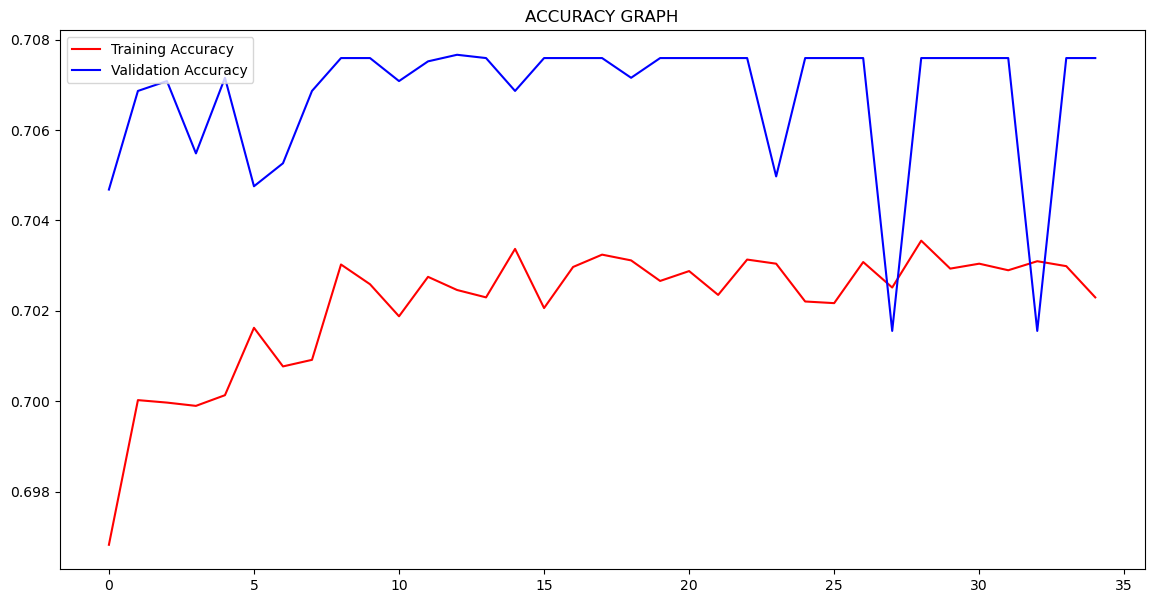

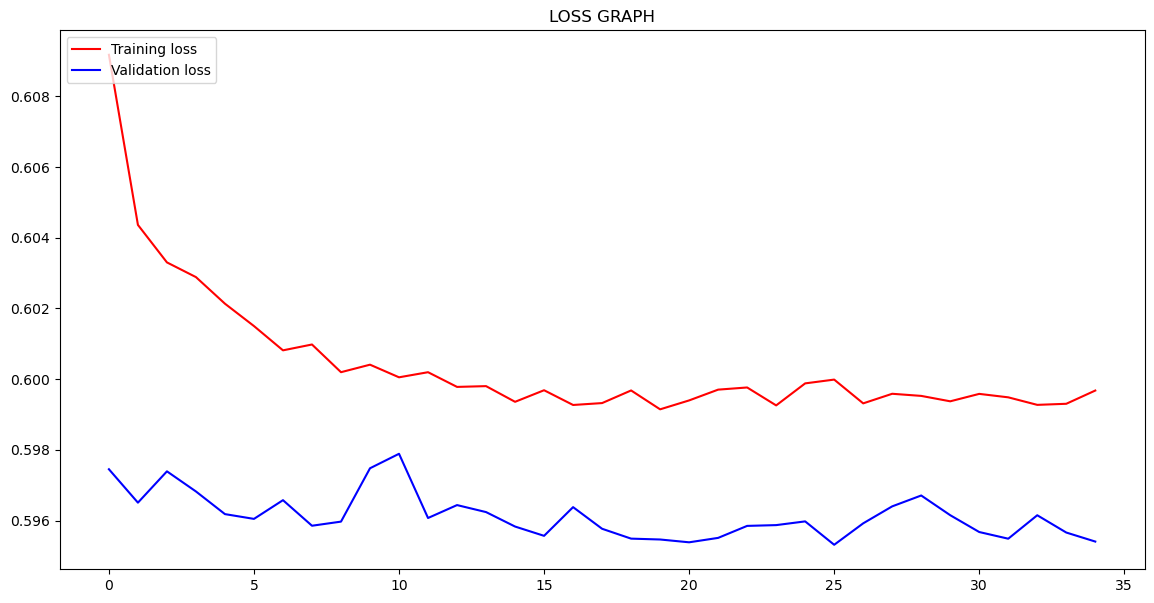

537/537 [==============================] - 3s 3ms/step


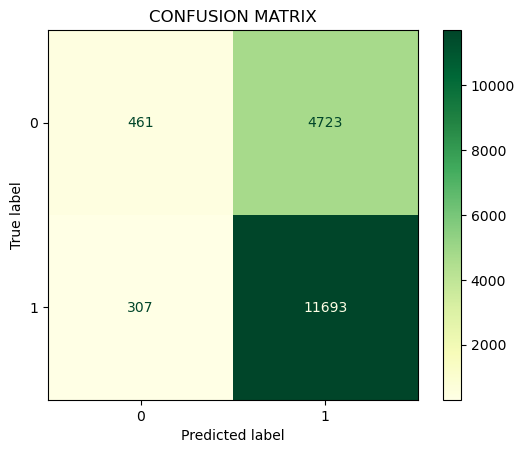

In [30]:
CNN_LSTM_model1.evaluate(X_test1,Y_test1)
eval_graph(CNN_LSTM_results_1)
conf_matrix(X_test1,Y_test1,CNN_LSTM_model1)

In [31]:
model_architecture = CNN_LSTM_model1.to_json()
with open('./modal/CNN_LSTM_model_dataset_filter_1_and_0_3.json', 'w') as json_file:
    json_file.write(model_architecture)

In [32]:
model_architecture = CNN_model1.to_json()
with open('./modal/CNN_model_dataset_filter_1_and_0.json_3', 'w') as json_file:
    json_file.write(model_architecture)

In [33]:
model_architecture = CNN_LSTM_model1.to_json()
with open('./modal/CNN_LSTM_contentv2_1.json', 'w') as json_file:
    json_file.write(model_architecture)

In [34]:
model_architecture = CNN_model1.to_json()
with open('./modal/CNN_contentv2_1.json', 'w') as json_file:
    json_file.write(model_architecture)